# Topic Modelling
This notebook runs all models for topic modelling and visualizes results to select the best topic model.

In [9]:
# run this if you run into "ModuleNotFoundError: No module named 'src'"
# import sys
# sys.path.insert(0, '../src')

In [61]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# importing modules
import transformations as c
from topic_modelling.train.train_nmf import train_nmf

In [13]:
# loading data
current_path = os.getcwd()
root_path = os.path.dirname(current_path)
df = pd.read_csv(root_path + '/data/reviews.csv', encoding='unicode_escape')

In [14]:
# clean data
df['stem_clean_text'] = df['Text'].apply(lambda x: c.get_cleantext(x, stemming=True))

In [23]:
# run LDA, NMF and LSA
num_topics = 20
n_top_words = 10
nmf_topic_words, nmf_pred, nmf_model = train_nmf(df, num_topics=num_topics, n_top_words=n_top_words)

In [26]:
# add topic predictions to df
df['nmf_pred'] = nmf_pred

## View top words of each topic

In [24]:
for [topic_idx, words] in nmf_topic_words:
    print(topic_idx, " ", words)

0   ['like', 'tast', 'tast like', 'dont', 'realli', 'better', 'realli like', 'much', 'didnt', 'like tast']
1   ['coffe', 'cup', 'brew', 'roast', 'cup coffe', 'bean', 'strong', 'coffe tast', 'tast coffe', 'blend']
2   ['tea', 'green tea', 'green', 'ice tea', 'ice', 'brew', 'drink', 'tea tast', 'black tea', 'tea bag']
3   ['price', 'amazon', 'great price', 'ship', 'buy', 'good price', 'get', 'save', 'subscrib', 'price amazon']
4   ['great', 'tast great', 'tast', 'great tast', 'love', 'great price', 'great product', 'make great', 'work', 'kid']
5   ['bar', 'snack', 'tasti', 'healthi', 'eat', 'calori', 'protein', 'sweet', 'nut', 'peanut']
6   ['dog', 'treat', 'love', 'china', 'dog love', 'made', 'made china', 'dog food', 'chicken', 'food']
7   ['free', 'gluten', 'gluten free', 'cooki', 'pasta', 'mix', 'sugar', 'sugar free', 'free diet', 'rice']
8   ['drink', 'juic', 'orang', 'sugar', 'soda', 'water', 'carbon', 'tangerin', 'bottl', 'sweet']
9   ['chocol', 'hot', 'hot chocol', 'cup', 'cocoa'

## View word cloud of predicted topics

In [74]:
def display_wordclouds(df, pred_col, num_topics):
    fig = plt.figure(figsize=(20,10))
    j = int(np.ceil(num_topics/4))
    for t in range(num_topics):
        # Join the different processed titles together.
        long_string = ','.join(list(df[df['nmf_pred']==t]['stem_clean_text'].values))
        # Create a WordCloud object
        wordcloud = WordCloud(width=700, height=250, background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
        # Generate a word cloud
        wordcloud.generate(long_string)
        i=t+1
        plt.subplot(j, 4, i).set_title("Topic #" + str(t))
        plt.plot()
        plt.imshow(wordcloud)
        plt.axis("off")
    plt.show()

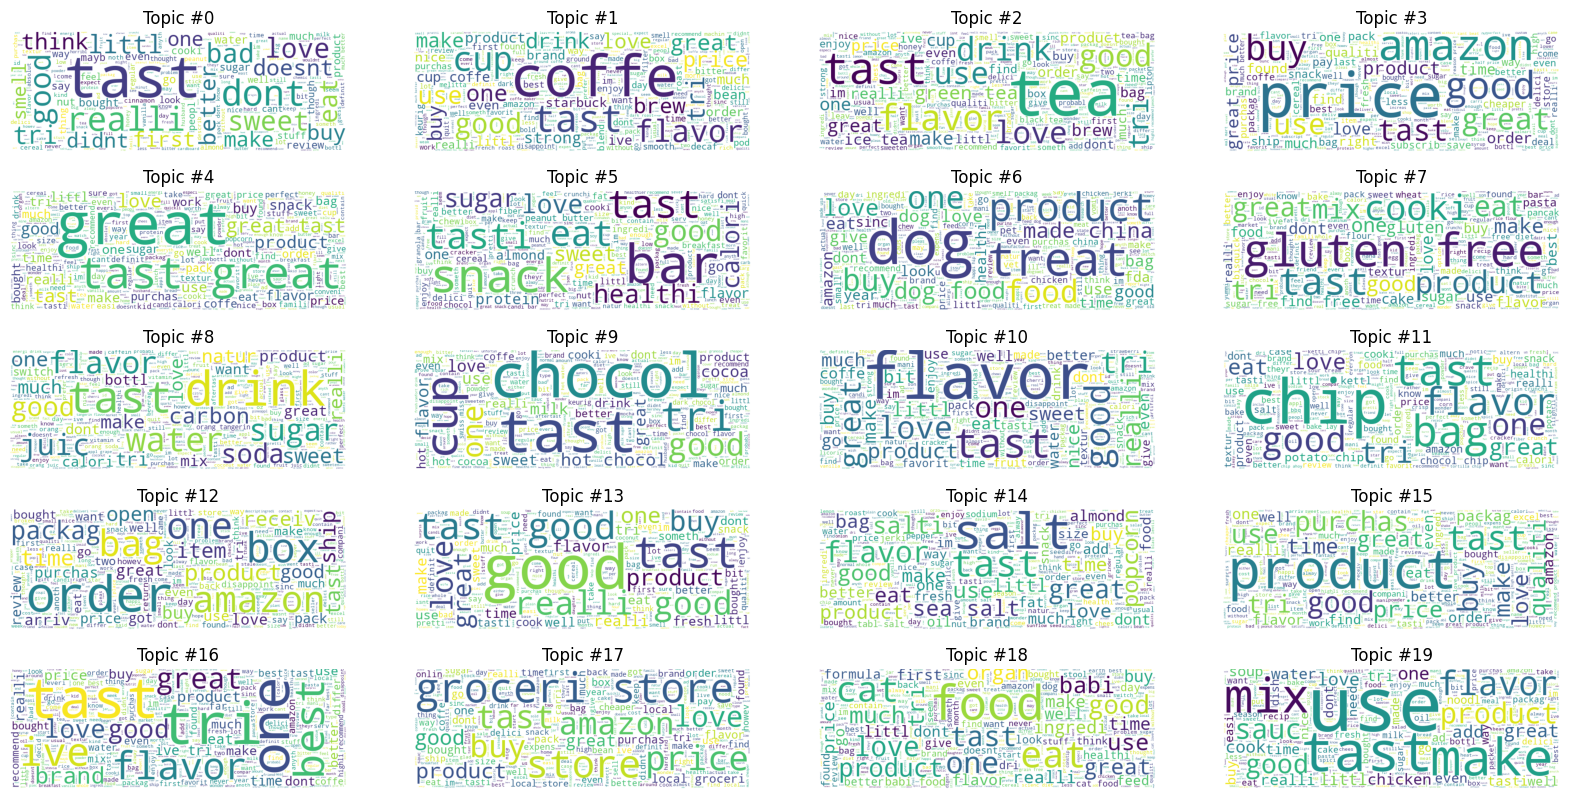

In [75]:
display_wordclouds(df, 'nmf_pred', num_topics=num_topics)